In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Read Data 


data= pd.read_excel('C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\Data_Weekly.xlsx', index_col ='Date',parse_dates = True)

In [3]:
data

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667
...,...,...,...,...
2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667
2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667
2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000


In [4]:
import copy

data2= copy.deepcopy(data) 


In [5]:
for i in data['Location'].unique():
    df= data[data['Location']==i]
    print(i, ":-", list(df['Item'].unique()))

FREMONT :- ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
HAYWARD :- ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
LAKEWOOD :- ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
RICHMOND CA :- ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
S SAN FRANCISCO BUS CTR :- ['BEEF OOOO - GT', 'DRUMSTICKS NNNN']


In [6]:
data3= data2[(data2['Location']== 'FREMONT') & (data2['Item']=='CHICKEN XXXXX - O')]

In [7]:
data3

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667
...,...,...,...,...
2022-10-30,FREMONT,CHICKEN XXXXX - O,38.625329,231.365714
2022-11-06,FREMONT,CHICKEN XXXXX - O,52.301170,313.284000
2022-11-13,FREMONT,CHICKEN XXXXX - O,41.523016,248.722857


In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [9]:
result=seasonal_decompose(data3['Quantity'], model='multiplicable', extrapolate_trend= 'freq')

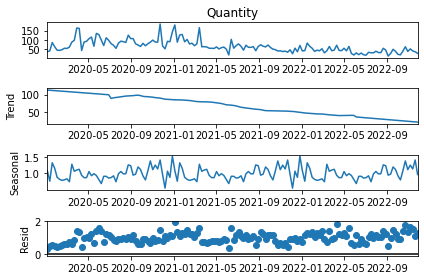

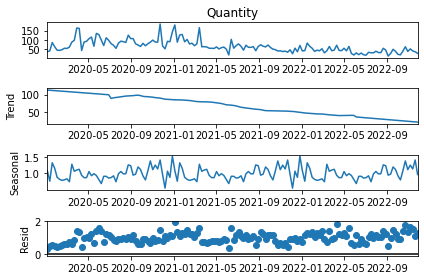

In [10]:
result.plot()

In [11]:
season_out1= pd.DataFrame()

season_out1['Trend'] = result.trend
season_out1['seasonal']  = result.seasonal
season_out1['resid']  = result.resid



In [12]:
season_out1

,Trend,seasonal,resid
Date,,,
2020-01-05,112.453897,1.085194,0.303385
2020-01-12,111.930588,0.761799,0.491268
2020-01-19,111.407280,1.325704,0.582974
2020-01-26,110.883972,1.158430,0.496952
2020-02-02,110.360663,0.881556,0.465838
...,...,...,...
2022-10-30,25.356623,1.115853,1.365130
2022-11-06,24.786812,1.254536,1.681929
2022-11-13,24.217001,1.137524,1.507329


In [13]:
season_out1

,Trend,seasonal,resid
Date,,,
2020-01-05,112.453897,1.085194,0.303385
2020-01-12,111.930588,0.761799,0.491268
2020-01-19,111.407280,1.325704,0.582974
2020-01-26,110.883972,1.158430,0.496952
2020-02-02,110.360663,0.881556,0.465838
...,...,...,...
2022-10-30,25.356623,1.115853,1.365130
2022-11-06,24.786812,1.254536,1.681929
2022-11-13,24.217001,1.137524,1.507329


In [14]:
df = pd.concat([data3,season_out1], axis=1 )

In [15]:
df

,Location,Item,Quantity,Amount,Trend,seasonal,resid
Date,,,,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838
...,...,...,...,...,...,...,...
2022-10-30,FREMONT,CHICKEN XXXXX - O,38.625329,231.365714,25.356623,1.115853,1.365130
2022-11-06,FREMONT,CHICKEN XXXXX - O,52.301170,313.284000,24.786812,1.254536,1.681929
2022-11-13,FREMONT,CHICKEN XXXXX - O,41.523016,248.722857,24.217001,1.137524,1.507329


In [16]:
data2.head()

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667


In [46]:
data_df = data2.reset_index()
data_df

,Date,Location,Item,Quantity,Amount
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667
...,...,...,...,...,...
2122,2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667
2123,2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667
2124,2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000
2125,2022-11-20,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667


In [47]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2127 non-null   datetime64[ns]
 1   Location  2127 non-null   object        
 2   Item      2127 non-null   object        
 3   Quantity  2127 non-null   float64       
 4   Amount    2127 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 83.2+ KB


### ALL ITEM AND LOCATIONS SEASONALITY

In [48]:
for i in data_df['Location'].unique():
    df= data_df[data_df['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]
        
#         print(item_data)
        item_data.set_index('Date')
        result=seasonal_decompose(item_data['Quantity'], model='multiplicable', period=52, extrapolate_trend= 'freq')
        
        
        #Results
        se_out= pd.DataFrame()
        se_out['Trend'] = result.trend
        se_out['seasonality']  = result.seasonal
        se_out['remainder']  = result.resid
#         se_out['Date']= train_dates.values
        df_out = pd.concat([item_data,se_out], axis=1 )
        
        predction_output = "ModelOut\seasonality\Weekly\season_" +i+"-"+j+".xlsx"
        df_out.to_excel(predction_output, index= False)
#         print(df_out)
  

In [49]:
df_out

,Date,Location,Item,Quantity,Amount,Trend,seasonality,remainder
1975,2020-01-05,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,45.462180,54.100000,176.021753,0.822388,0.314056
1976,2020-01-12,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,109.512608,130.320000,175.727830,0.889478,0.700630
1977,2020-01-19,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,64.205885,76.405000,175.433908,1.116553,0.327780
1978,2020-01-26,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,62.563028,74.450000,175.139985,0.731069,0.488623
1979,2020-02-02,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,90.672268,107.900000,174.846063,0.751758,0.689827
...,...,...,...,...,...,...,...,...
2122,2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667,104.805140,1.063417,1.018495
2123,2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667,104.246673,0.974794,0.958525
2124,2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000,103.688207,0.849544,1.058495
2125,2022-11-20,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667,103.129740,0.912276,1.003171


In [50]:
import pandas as pd
import os
import glob

In [51]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\seasonality\\Weekly'
out_files = glob.glob(os.path.join(path, "*.xlsx"))
   
dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df_season=pd.concat(dfs, ignore_index=True)


In [52]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2127 non-null   datetime64[ns]
 1   Location     2127 non-null   object        
 2   Item         2127 non-null   object        
 3   Quantity     2127 non-null   float64       
 4   Amount       2127 non-null   float64       
 5   Trend        2127 non-null   float64       
 6   seasonality  2127 non-null   float64       
 7   remainder    2127 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 133.1+ KB


In [53]:
df_season

,Date,Location,Item,Quantity,Amount,Trend,seasonality,remainder
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838
...,...,...,...,...,...,...,...,...
2122,2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667,104.805140,1.063417,1.018495
2123,2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667,104.246673,0.974794,0.958525
2124,2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000,103.688207,0.849544,1.058495
2125,2022-11-20,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667,103.129740,0.912276,1.003171


In [ ]:
# df_season.to_excel('Seasonality_all_Weekly_SArima.xlsx', index=False)

In [ ]:
df_season

### One item and location model

In [21]:
data3= data2[(data2['Location']== 'FREMONT') & (data2['Item']=='CHICKEN XXXXX - O')]

In [22]:
data3.head()

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667


In [23]:
# item_data= item_data.drop(['Location', 'Item', 'Amount'], axis=1)
# time_series = item_data.index
train = data3.iloc[:len(data3)-31]
test = data3.iloc[len(data3)-31:] # set 31 weeks for testing
        
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Quantity'],order = (1, 1, 1),seasonal_order =(2, 1, 1, 12))
  
result = model.fit(disp=False)
    
forecast = result.predict(start = 1, end = (len(data3)), typ = 'levels').rename('Forecast')

C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [24]:
forecast

2020-01-12    37.006498
2020-01-19    41.882217
2020-01-26    86.059528
2020-02-02    63.846628
2020-02-09    45.340172
                ...    
2022-11-06    40.164559
2022-11-13    37.625497
2022-11-20    45.287592
2022-11-27    44.978636
2022-12-04    37.918346
Freq: W-SUN, Name: Forecast, Length: 152, dtype: float64

In [25]:
# time_series = data3.index
# df_forecast = pd.DataFrame()
# df_forecast['Date']= time_series
# df_forecast['Forcasted_Qty']= forecast.values

In [26]:
# df_forecast

In [27]:
# df= data3.reset_index()

In [28]:
# merge= pd.merge(df, df_forecast, on=['Date'], how= 'outer')

In [29]:
# merge

In [30]:
result_df = (result.get_prediction(start= 1, end=(len(data3))).summary_frame(alpha=0.05))

In [31]:
# result_df= result_df.rename(columns={'Quantity':'Date', 'mean':'Forecasted_Qty', 'mean_se':'MSE', 'mean_ci_lower':'yhat_lower', \
#                          'mean_ci_upper':'yhat_upper'})

In [32]:
# result_df.reset_index(inplace=True)

In [33]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2020-01-12 to 2022-12-04
Freq: W-SUN
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean           152 non-null    float64
 1   mean_se        152 non-null    float64
 2   mean_ci_lower  152 non-null    float64
 3   mean_ci_upper  152 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [ ]:
# df= pd.DataFrame(result_df)


In [ ]:
# df.head()

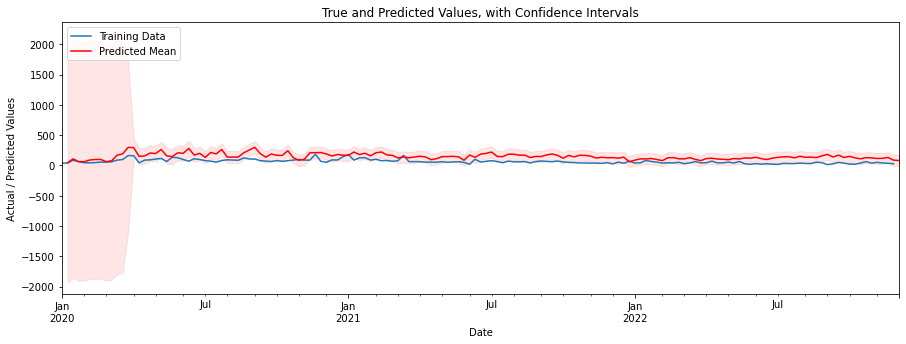

In [78]:
# Plot the training data, predicted means and confidence intervals
fig, ax = plt.subplots(figsize=(15,5))
ax = data3['Quantity'].plot(label='Training Data')
ax.set(
    title='True and Predicted Values, with Confidence Intervals',
    xlabel='Date',
    ylabel='Actual / Predicted Values'
)
result_df['mean'].plot(ax=ax, style='r', label='Predicted Mean')
ax.fill_between(
    result_df.index, result_df['mean_ci_lower'], result_df['mean_ci_upper'],
    color='r', alpha=0.1
)
legend = ax.legend(loc='upper left')
plt.show()

In [34]:
df1= pd.DataFrame()
df1['Date'] = data3.index
df1['Forecast_Qty']= result_df['mean'].values
df1['Pred_lower']= result_df['mean_ci_lower'].values
df1['Pred_upper']= result_df['mean_ci_upper'].values


In [35]:
df1

,Date,Forecast_Qty,Pred_lower,Pred_upper
0,2020-01-05,37.006498,-1925.220569,1999.233565
1,2020-01-12,41.882217,-1920.344430,2004.108864
2,2020-01-19,86.059528,-1876.167104,2048.286160
3,2020-01-26,63.846628,-1898.380004,2026.073260
4,2020-02-02,45.340172,-1916.886459,2007.566804
...,...,...,...,...
147,2022-10-30,40.164559,-43.246699,123.575816
148,2022-11-06,37.625497,-46.614953,121.865948
149,2022-11-13,45.287592,-39.773620,130.348804
150,2022-11-20,44.978636,-40.895460,130.852733


In [36]:
df1.isnull().sum()

Date            0
Forecast_Qty    0
Pred_lower      0
Pred_upper      0
dtype: int64

In [37]:
df= data3.reset_index()

In [38]:
merge1= pd.merge(df, df1, on=['Date'], how='inner')

In [39]:
merge1

,Date,Location,Item,Quantity,Amount,Forecast_Qty,Pred_lower,Pred_upper
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,37.006498,-1925.220569,1999.233565
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,41.882217,-1920.344430,2004.108864
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,86.059528,-1876.167104,2048.286160
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,63.846628,-1898.380004,2026.073260
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,45.340172,-1916.886459,2007.566804
...,...,...,...,...,...,...,...,...
147,2022-10-30,FREMONT,CHICKEN XXXXX - O,38.625329,231.365714,40.164559,-43.246699,123.575816
148,2022-11-06,FREMONT,CHICKEN XXXXX - O,52.301170,313.284000,37.625497,-46.614953,121.865948
149,2022-11-13,FREMONT,CHICKEN XXXXX - O,41.523016,248.722857,45.287592,-39.773620,130.348804
150,2022-11-20,FREMONT,CHICKEN XXXXX - O,36.942523,221.285714,44.978636,-40.895460,130.852733


In [ ]:
# result_df.predicted_mean

In [ ]:
# result_df.conf_int()

### All in one Model

In [ ]:
# data_df= data_df.set_index('Date')

In [40]:
data_df= data2.copy()

In [41]:
for i in data_df['Location'].unique():
    df= data_df[data_df['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]
        
        item_data= item_data.drop(['Location', 'Item', 'Amount'], axis=1)
        time_series = item_data.index
        train = item_data.iloc[:len(df)-31]
        test = item_data.iloc[len(df)-31:] # set 31 Months for testing
        
        from statsmodels.tsa.statespace.sarimax import SARIMAX
  
        model = SARIMAX(train['Quantity'], 
                order = (1, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
        result = model.fit()
    
#         forecast = result.predict(start = 1, 
#                           end = (len(item_data)), 
#                           typ = 'levels').rename('Forecast')
        
        result_df = (result.get_prediction(start= 1, end=(len(item_data))).summary_frame(alpha=0.05))
        
        df1= pd.DataFrame()
        df1['Date'] = time_series
        df1['Forecast_Qty']= result_df['mean'].values
        df1['Pred_lower']= result_df['mean_ci_lower'].values
        df1['Pred_upper']= result_df['mean_ci_upper'].values
        


#         df_forecast = pd.DataFrame()
#         df_forecast['Date']= time_series
#         df_forecast['Forcasted_Qty']= forecast.values
        
        #Saving Results 
        df1['Location']= i
        df1['Item']=j
        
        print("\n")
        print(f'Writing predicted results of {i} and {j}')
        predction_output = "ModelOut\All_out\Weekly\Output_bound\Output_bound -" +i+"-"+j+".xlsx"
        df1.to_excel(predction_output, index= False)
        
        # Load specific evaluation tools
#         from sklearn.metrics import mean_squared_error
# #         from statsmodels.tools.eval_measures import rmse
#         import math
        

#         Calculate mean squared error
#         MSE_Score= mean_squared_error(item_data["Quantity"], forecast.values)
        
#         RMSE_Score= math.sqrt(mean_squared_error(item_data["Quantity"], forecast.values))
        
#         col_names =  ['MSE_Score', 'RMSE_Score']
#         Error_matric= pd.DataFrame(columns = col_names)
        
#         my_out = {'MSE_Score': MSE_Score, 'RMSE_Score': RMSE_Score}
#         Error_matric.loc[len(Error_matric)] = my_out 
        
#         Error_matric['Location']=i
#         Error_matric['Item']=j
        
#         print(f'Writing error matrices of {i} and {j}')
#         print("\n")
#         Error_output = "ModelOut\All_out\Weekly\Error\Output_Error -" +i+"-"+j+".xlsx"
#         Error_matric.to_excel(Error_output, index= False)
        
        
        

C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of FREMONT and CHICKEN XXXXX - O


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information wa



Writing predicted results of FREMONT and DRUMSTICKS NNNN


Writing predicted results of FREMONT and FILLET QQQQ


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda



Writing predicted results of HAYWARD and CHICKEN XXXXX - O


Writing predicted results of HAYWARD and DRUMSTICKS NNNN


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of HAYWARD and FILLET QQQQ


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of LAKEWOOD and CHICKEN XXXXX - O


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of LAKEWOOD and DRUMSTICKS NNNN


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of LAKEWOOD and FILLET QQQQ


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of RICHMOND CA and CHICKEN XXXXX - O


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of RICHMOND CA and DRUMSTICKS NNNN


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of RICHMOND CA and FILLET QQQQ


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of S SAN FRANCISCO BUS CTR and BEEF OOOO - GT


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)




Writing predicted results of S SAN FRANCISCO BUS CTR and DRUMSTICKS NNNN


In [ ]:
# merge1['Location'].unique()

In [42]:
import pandas as pd
import os
import glob

In [43]:
# use glob to get all the csv files
# for output with bound

path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\Weekly\\Output_bound\\'
out_files = glob.glob(os.path.join(path, "*.xlsx"))

dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df_bound = pd.concat(dfs, ignore_index=True)

In [44]:
df_bound

,Date,Forecast_Qty,Pred_lower,Pred_upper,Location,Item
0,2020-01-05,37.009270,-1924.871388,1998.889928,FREMONT,CHICKEN XXXXX - O
1,2020-01-12,41.883290,-1919.997072,2003.763653,FREMONT,CHICKEN XXXXX - O
2,2020-01-19,86.066259,-1875.814092,2047.946610,FREMONT,CHICKEN XXXXX - O
3,2020-01-26,63.844131,-1898.036220,2025.724481,FREMONT,CHICKEN XXXXX - O
4,2020-02-02,45.337062,-1916.543289,2007.217413,FREMONT,CHICKEN XXXXX - O
...,...,...,...,...,...,...
2122,2022-10-30,115.517915,24.800919,206.234911,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2123,2022-11-06,118.614955,27.900641,209.329269,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2124,2022-11-13,132.863461,42.150760,223.576162,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2125,2022-11-20,87.941498,-2.770236,178.653231,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [ ]:
# data2.reset_index()

In [54]:
from functools import reduce

data_frames = [df_bound, df_season]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date','Location', 'Item'],
                                            how='inner'), data_frames)



In [55]:
df_merged

,Date,Forecast_Qty,Pred_lower,Pred_upper,Location,Item,Quantity,Amount,Trend,seasonality,remainder
0,2020-01-05,37.009270,-1924.871388,1998.889928,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385
1,2020-01-12,41.883290,-1919.997072,2003.763653,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268
2,2020-01-19,86.066259,-1875.814092,2047.946610,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974
3,2020-01-26,63.844131,-1898.036220,2025.724481,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952
4,2020-02-02,45.337062,-1916.543289,2007.217413,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838
...,...,...,...,...,...,...,...,...,...,...,...
2122,2022-10-30,115.517915,24.800919,206.234911,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667,104.805140,1.063417,1.018495
2123,2022-11-06,118.614955,27.900641,209.329269,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667,104.246673,0.974794,0.958525
2124,2022-11-13,132.863461,42.150760,223.576162,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000,103.688207,0.849544,1.058495
2125,2022-11-20,87.941498,-2.770236,178.653231,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667,103.129740,0.912276,1.003171


In [56]:
df_merged = df_merged.reindex(columns=['Date', 'Location', 'Item', 'Quantity', 'Amount', 'Trend', 'seasonality', 'remainder', 'Forecast_Qty', 'Pred_lower', 'Pred_upper'])

In [ ]:
# merge2.to_excel('All_Output_With_Bound_SARIMA_Weekly.xlsx', index=False)

In [ ]:
# use glob to get all the csv files
# in the folder

## For output files 

# path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\Weekly\\Output\\'
# out_files = glob.glob(os.path.join(path, "*.xlsx"))

# dfs= []


# for f in out_files:
#     dfs.append(pd.read_excel(f))
# df=pd.concat(dfs, ignore_index=True)

In [ ]:
# df.to_excel('Output_all_SARIMA_Weekly.xlsx', index=False)

In [ ]:
# path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\Weekly\\Error\\'
# error_files = glob.glob(os.path.join(path, "*.xlsx"))

# len(error_files)

# dfs_err= []


# for f in error_files:
#     dfs_err.append(pd.read_excel(f))
# dfs_err=pd.concat(dfs_err, ignore_index=True)

In [ ]:
#  dfs_err.to_excel('Error_Output_all_SARIMA_Weekly.xlsx', index=False)

In [ ]:
# df

In [ ]:
# merge1= pd.merge(df_season, df, on=['Date', 'Location', 'Item'], how= 'inner')

In [ ]:
# merge1

In [ ]:
# merge1.info()

In [ ]:
#  merge1.to_excel('Final_Data_SARIMA_Weekly_BI.xlsx', index=False)

In [ ]:
# merge2 = merge1[merge1['Date'] >= '2022-05-01']

In [ ]:
#  merge2.to_excel('Final_Data_SARIMA_6Mths_Forcst_Weekly.xlsx', index=False)

In [ ]:
merge2

In [58]:
df_merged

,Date,Location,Item,Quantity,Amount,Trend,seasonality,remainder,Forecast_Qty,Pred_lower,Pred_upper
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385,37.009270,-1924.871388,1998.889928
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268,41.883290,-1919.997072,2003.763653
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974,86.066259,-1875.814092,2047.946610
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952,63.844131,-1898.036220,2025.724481
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838,45.337062,-1916.543289,2007.217413
...,...,...,...,...,...,...,...,...,...,...,...
2122,2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667,104.805140,1.063417,1.018495,115.517915,24.800919,206.234911
2123,2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667,104.246673,0.974794,0.958525,118.614955,27.900641,209.329269
2124,2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000,103.688207,0.849544,1.058495,132.863461,42.150760,223.576162
2125,2022-11-20,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667,103.129740,0.912276,1.003171,87.941498,-2.770236,178.653231


In [59]:
df_merged['stock_percentage_chng']= ((df_merged["Forecast_Qty"]-df_merged["Quantity"])/df_merged["Quantity"])*100

In [60]:
df_merged

,Date,Location,Item,Quantity,Amount,Trend,seasonality,remainder,Forecast_Qty,Pred_lower,Pred_upper,stock_percentage_chng
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385,37.009270,-1924.871388,1998.889928,-0.038111
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268,41.883290,-1919.997072,2003.763653,-0.015492
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974,86.066259,-1875.814092,2047.946610,-0.040593
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952,63.844131,-1898.036220,2025.724481,0.015764
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838,45.337062,-1916.543289,2007.217413,0.035492
...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667,104.805140,1.063417,1.018495,115.517915,24.800919,206.234911,1.766310
2123,2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667,104.246673,0.974794,0.958525,118.614955,27.900641,209.329269,21.775775
2124,2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000,103.688207,0.849544,1.058495,132.863461,42.150760,223.576162,42.495738
2125,2022-11-20,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667,103.129740,0.912276,1.003171,87.941498,-2.770236,178.653231,-6.823010


In [61]:
conditions = [
    (df_merged['stock_percentage_chng'] <= 0),
    (df_merged['stock_percentage_chng'] > 0) & (df_merged['stock_percentage_chng'] <= 25),
    (df_merged['stock_percentage_chng'] > 25)]


values = ['Understock', 'Onhand', 'Overstock']


df_merged["Stocks"]=np.select(conditions, values)


In [62]:
df_merged

,Date,Location,Item,Quantity,Amount,Trend,seasonality,remainder,Forecast_Qty,Pred_lower,Pred_upper,stock_percentage_chng,Stocks
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385,37.009270,-1924.871388,1998.889928,-0.038111,Understock
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268,41.883290,-1919.997072,2003.763653,-0.015492,Understock
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974,86.066259,-1875.814092,2047.946610,-0.040593,Understock
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952,63.844131,-1898.036220,2025.724481,0.015764,Onhand
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838,45.337062,-1916.543289,2007.217413,0.035492,Onhand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667,104.805140,1.063417,1.018495,115.517915,24.800919,206.234911,1.766310,Onhand
2123,2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667,104.246673,0.974794,0.958525,118.614955,27.900641,209.329269,21.775775,Onhand
2124,2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000,103.688207,0.849544,1.058495,132.863461,42.150760,223.576162,42.495738,Overstock
2125,2022-11-20,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667,103.129740,0.912276,1.003171,87.941498,-2.770236,178.653231,-6.823010,Understock


In [63]:
def stock_flag(row):
    if row["Stocks"]== 'Overstock':
        return 1
    elif row["Stocks"]== 'Understock':
        return 2
    if row["Stocks"]== 'Onhand':
        return 3

In [64]:
df_merged["stock_flag"] = df_merged.apply(stock_flag,axis=1)

In [65]:
df_merged

,Date,Location,Item,Quantity,Amount,Trend,seasonality,remainder,Forecast_Qty,Pred_lower,Pred_upper,stock_percentage_chng,Stocks,stock_flag
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385,37.009270,-1924.871388,1998.889928,-0.038111,Understock,2
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268,41.883290,-1919.997072,2003.763653,-0.015492,Understock,2
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974,86.066259,-1875.814092,2047.946610,-0.040593,Understock,2
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952,63.844131,-1898.036220,2025.724481,0.015764,Onhand,3
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838,45.337062,-1916.543289,2007.217413,0.035492,Onhand,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667,104.805140,1.063417,1.018495,115.517915,24.800919,206.234911,1.766310,Onhand,3
2123,2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667,104.246673,0.974794,0.958525,118.614955,27.900641,209.329269,21.775775,Onhand,3
2124,2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000,103.688207,0.849544,1.058495,132.863461,42.150760,223.576162,42.495738,Overstock,1
2125,2022-11-20,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,94.381132,121.751667,103.129740,0.912276,1.003171,87.941498,-2.770236,178.653231,-6.823010,Understock,2


In [66]:
# df_merged.to_excel('Final_data_with_conf_int_Weekly.xlsx', index=False)

In [ ]:
# merge2= merge2.drop(['Trend', 'seasonality', 'remainder'], axis=1)

In [ ]:
# merge2.to_excel('Final_6Mths_Analysis_Weekly.xlsx', index=False)

In [67]:
df_plot = df_merged[(df_merged['Location']== 'FREMONT') & (df_merged['Item']=='CHICKEN XXXXX - O')]

In [69]:
df_plot.head()

,Date,Location,Item,Quantity,Amount,Trend,seasonality,remainder,Forecast_Qty,Pred_lower,Pred_upper,stock_percentage_chng,Stocks,stock_flag
0,2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667,112.453897,1.085194,0.303385,37.009270,-1924.871388,1998.889928,-0.038111,Understock,2
1,2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000,111.930588,0.761799,0.491268,41.883290,-1919.997072,2003.763653,-0.015492,Understock,2
2,2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000,111.407280,1.325704,0.582974,86.066259,-1875.814092,2047.946610,-0.040593,Understock,2
3,2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000,110.883972,1.158430,0.496952,63.844131,-1898.036220,2025.724481,0.015764,Onhand,3
4,2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667,110.360663,0.881556,0.465838,45.337062,-1916.543289,2007.217413,0.035492,Onhand,3


In [72]:
df_plot= df_plot.set_index('Date')

In [74]:
# df_plot

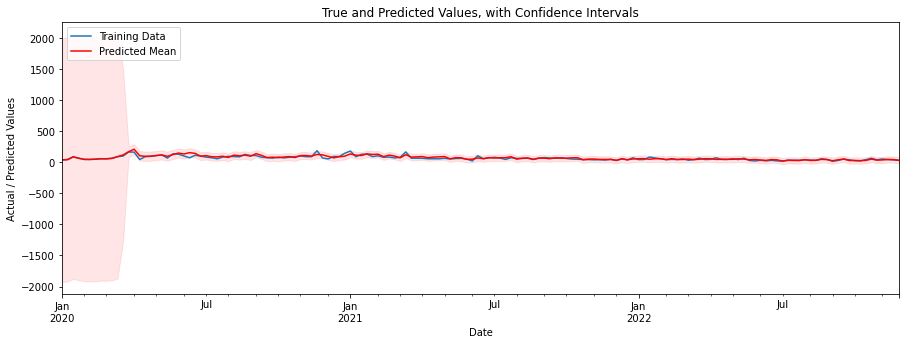

In [76]:
# Plot the training data, predicted means and confidence intervals
fig, ax = plt.subplots(figsize=(15,5))
ax = df_plot['Quantity'].plot(label='Training Data')
ax.set(
    title='True and Predicted Values, with Confidence Intervals',
    xlabel='Date',
    ylabel='Actual / Predicted Values'
)
df_plot['Forecast_Qty'].plot(ax=ax, style='r', label='Predicted Mean')
ax.fill_between(
    df_plot.index, df_plot['Pred_lower'], df_plot['Pred_upper'],
    color='r', alpha=0.1
)
legend = ax.legend(loc='upper left')
plt.show()